[nltk_data] Downloading package punkt to /home/maxiserver/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/maxiserver/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/maxiserver/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /home/maxiserver/nltk_data...
[nltk_data]   Package words is already up-to-date!


['Sergio Massa', 'París Elecciones', 'Córdoba', 'Massa', 'Juez', 'Córdoba Cerraron', 'Parlasur', 'Paso Cristo', 'Mitre', 'Retiro De', 'Modelo Córdoba', 'Patricia Bullrich', 'Luis Juez Larreta', 'Morales', 'Santilli', 'Gobierno', 'Ciudad', 'Buenos Aires Elecciones', 'Buenos Aires Elecciones', 'Industria', 'Riachuelo', 'China Las', 'Riquelme Las', 'Santiago Escobar', 'Para', 'River Video', 'Messi', 'Emelec Boca', 'Riquelme', 'Otro', 'Suárez', 'Gremio Vombergar', 'Al Ittihad Kalba El', 'Gustavo Gómez', 'Luis Juez', 'Martín Llaryora', 'Córdoba Córdoba', 'Caso Cecilia Strzyzowski', 'Córdoba', 'JxC', 'Caso Cecilia Strzyzowski', 'Marcela Acuña', 'Luis Petri', 'Patricia Bullrich', 'César Sena', 'Ciudad', 'Buenos Aires', 'Elecciones', 'Gildo Insfrán', 'Ciudad', 'Buenos Aires', 'Banco Central', 'Alberto Fernández Caso Emanuela Orlandi', 'Papa Francisco', 'Sergio', 'Patricia', 'Horacio', 'Luis Juez', 'Elisa Carrió Carrió', 'Parlasur', 'Larreta Schiaretti', 'Myrian Prunotto', 'Mario Negri', 'Gildo

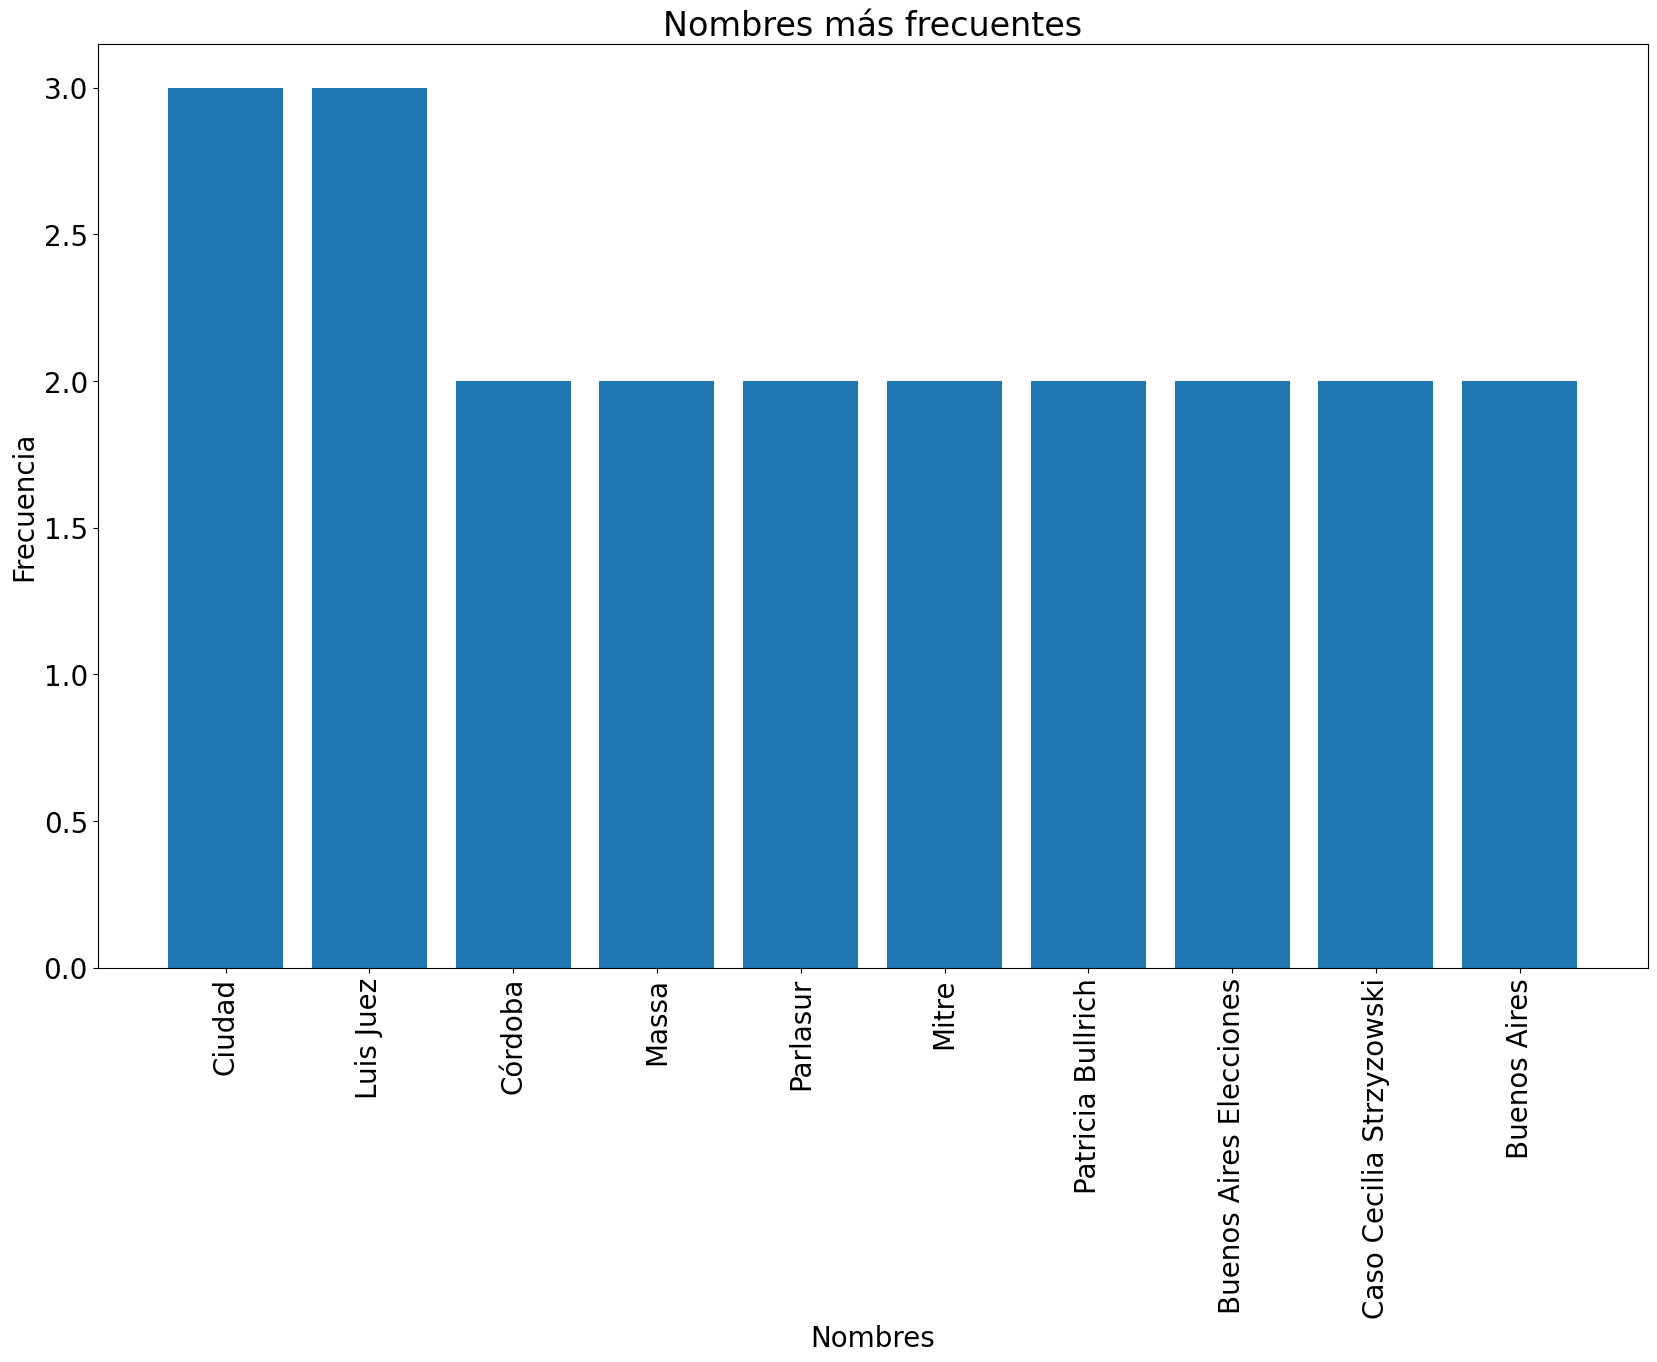

In [1]:
import sqlite3
import nltk
import re
from matplotlib import pyplot as plt

conn = sqlite3.connect('DBTic.db')
c = conn.cursor()

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

def recognize_names(text):
    sentences = nltk.sent_tokenize(text)
    tokenized_sentences = [nltk.word_tokenize(sentence) for sentence in sentences]
    tagged_sentences = [nltk.pos_tag(sentence) for sentence in tokenized_sentences]
    named_entities = nltk.ne_chunk_sents(tagged_sentences, binary=True)

    names = []
    for tree in named_entities:
        for entity in tree:
            if hasattr(entity, 'label') and entity.label() == 'NE':
                name = ' '.join([child[0] for child in entity])
                if not re.search(r'\b[A-Z]+\b', name):
                    names.append(name)

    return names

# Obtener títulos de las tablas
tables = ["Ambito_Financiero", "Ole", "Perfil", "Telam"]
titles = []
for table in tables:
    c.execute(f"SELECT Titulo FROM {table}")
    result = c.fetchall()
    titles.extend([row[0] for row in result])

text = ' '.join(titles)

names = recognize_names(text)
print(names)

# Generar gráfico de barras con la frecuencia de los nombres
name_freq = nltk.FreqDist(names)
top_names = name_freq.most_common(10)  # Obtener los nombres más frecuentes

names, frequencies = zip(*top_names)

plt.rcParams['font.size'] = 20
plt.figure(figsize=(20, 12))
plt.bar(names, frequencies)
plt.xlabel('Nombres')
plt.ylabel('Frecuencia')
plt.title('Nombres más frecuentes')
plt.xticks(rotation=90)
plt.show()

conn.commit()
conn.close()
